In [1]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("data/raw")

train_path = DATA_DIR / "mitbih_train.csv"
test_path  = DATA_DIR / "mitbih_test.csv"

train = pd.read_csv(train_path, header=None)
test  = pd.read_csv(test_path, header=None)

print("train shape:", train.shape)
print("test shape :", test.shape)

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

print("labels:", sorted(y_train.unique()))
print("class counts:\n", y_train.value_counts().sort_index())


train shape: (87554, 188)
test shape : (21892, 188)
labels: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)]
class counts:
 187
0.0    72471
1.0     2223
2.0     5788
3.0      641
4.0     6431
Name: count, dtype: int64


In [2]:
print(train.head())
print(train.isna().sum().sum(), "missing values in train")
print(test.isna().sum().sum(), "missing values in test")


        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

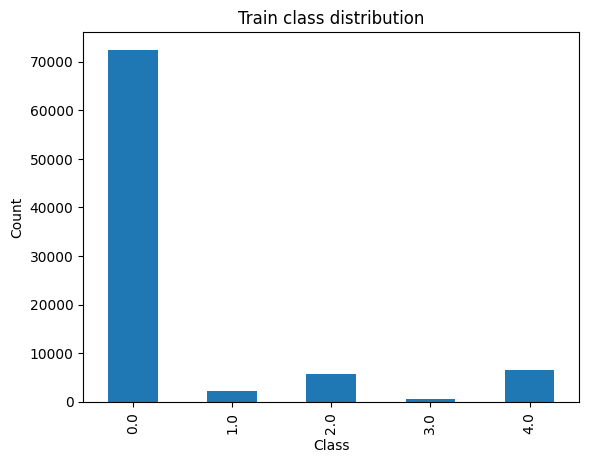

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

counts = pd.Series(y_train).value_counts().sort_index()
counts.plot(kind="bar")
plt.title("Train class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


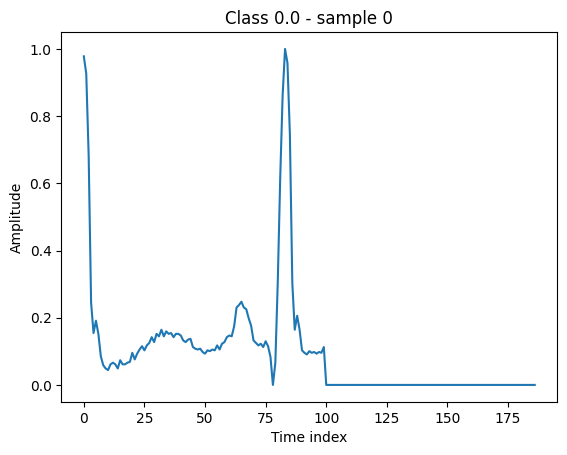

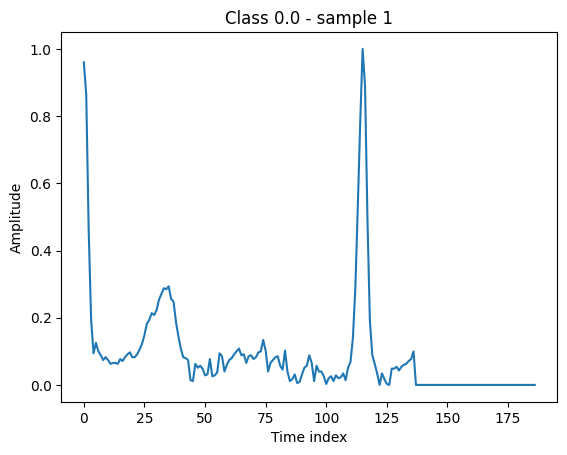

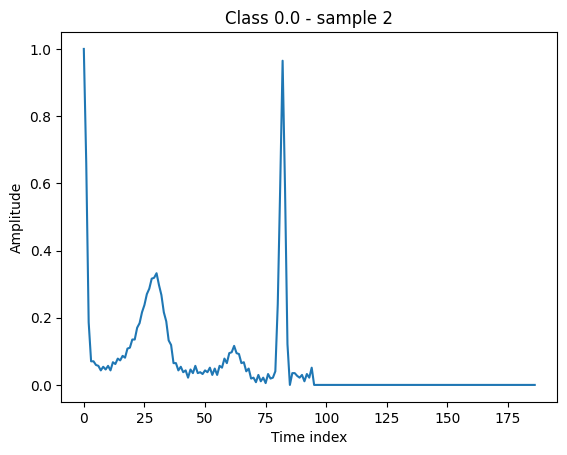

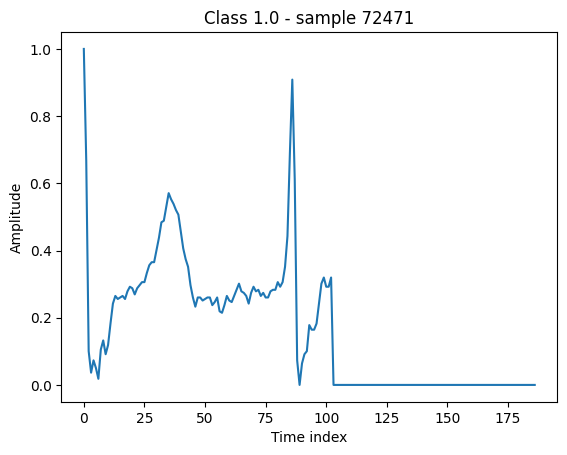

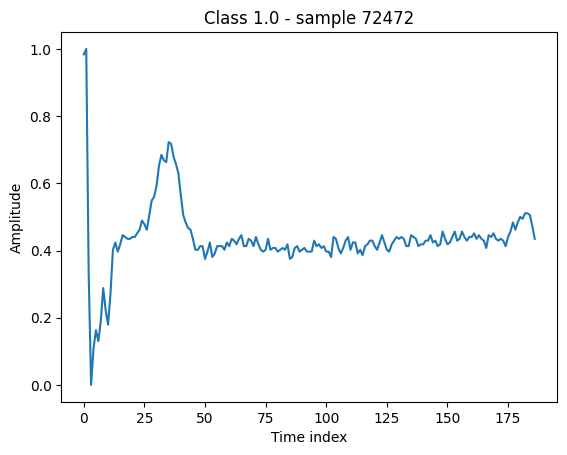

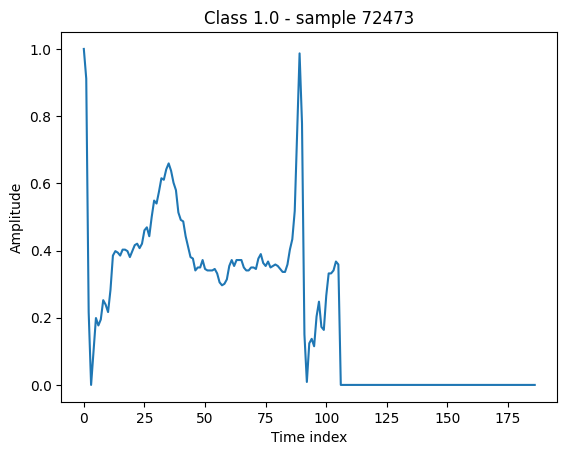

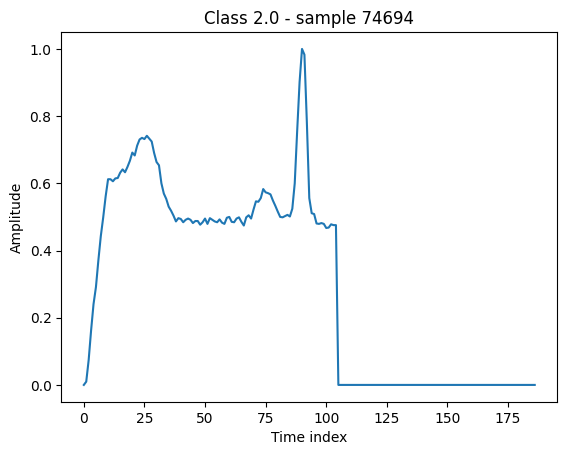

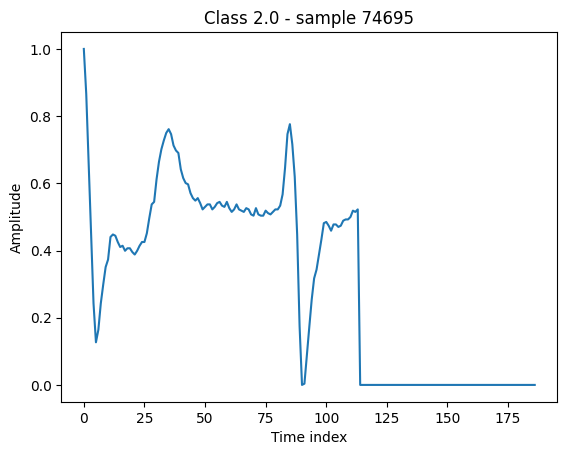

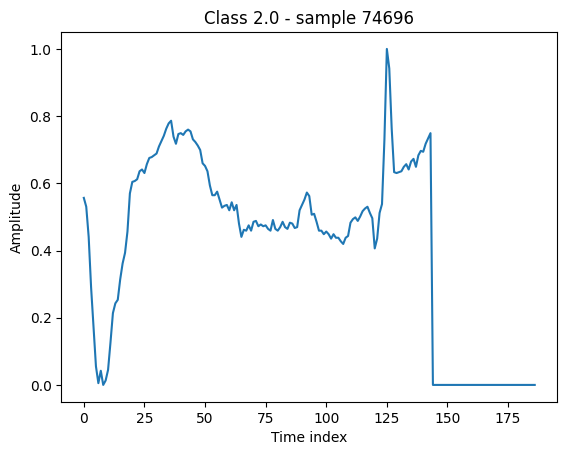

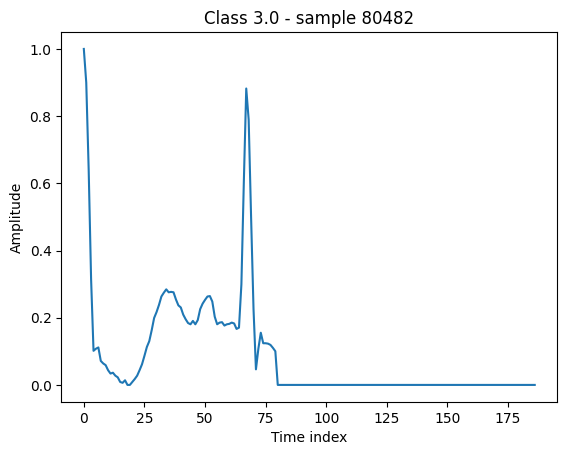

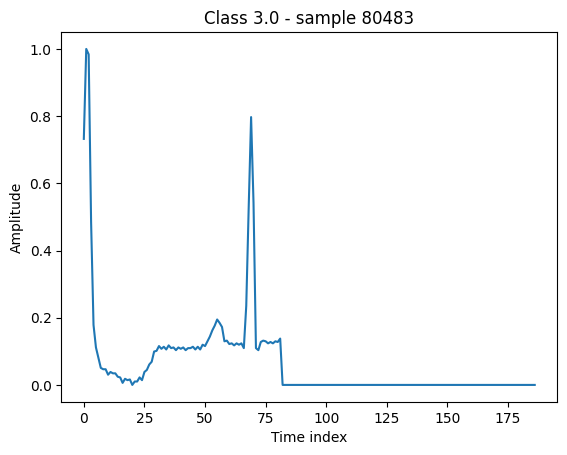

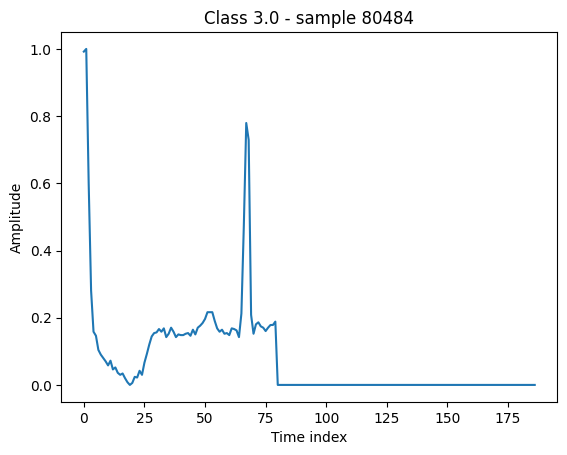

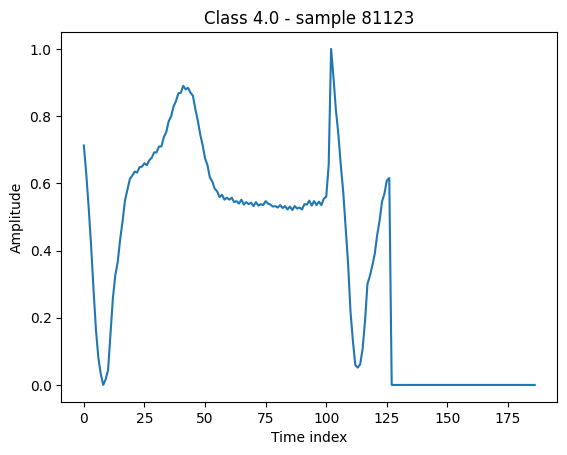

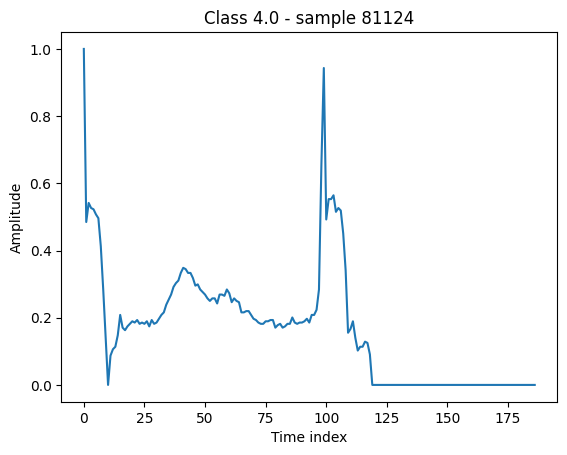

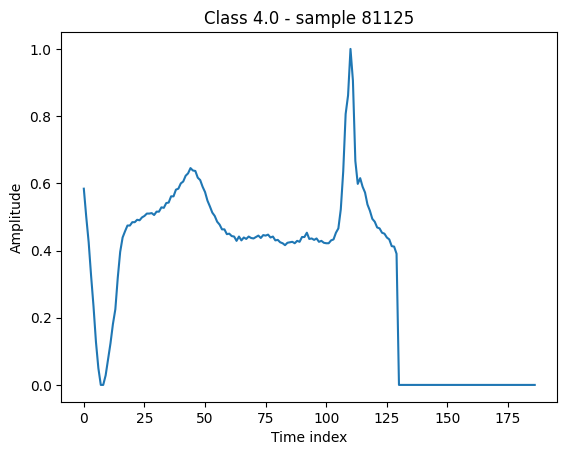

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X_train = train.iloc[:, :-1].values

for cls in sorted(np.unique(y_train)):
    idx = np.where(y_train == cls)[0][:3]  # 3 examples
    for i in idx:
        plt.figure()
        plt.plot(X_train[i])
        plt.title(f"Class {cls} - sample {i}")
        plt.xlabel("Time index")
        plt.ylabel("Amplitude")
        plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X = train.iloc[:, :-1].values
y = train.iloc[:, -1].astype(int).values

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_tr.shape, X_val.shape)

# test set from mitbih_test.csv
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].astype(int).values

print("test:", X_test.shape, "labels:", sorted(set(y_test)))



(70043, 187) (17511, 187)
test: (21892, 187) labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# ensure label int
y_tr  = y_tr.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

scaler = StandardScaler()
X_tr_s  = scaler.fit_transform(X_tr)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

print(X_tr_s.shape, X_val_s.shape, X_test_s.shape)


(70043, 187) (17511, 187) (21892, 187)


In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=3000,
    solver="lbfgs"
)

lr.fit(X_tr_s, y_tr)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

VAL accuracy: 0.9137113814173948
              precision    recall  f1-score   support

           0     0.9254    0.9816    0.9527     14494
           1     0.8238    0.4517    0.5835       445
           2     0.6325    0.3359    0.4388      1158
           3     0.6852    0.2891    0.4066       128
           4     0.9362    0.8904    0.9127      1286

    accuracy                         0.9137     17511
   macro avg     0.8006    0.5897    0.6589     17511
weighted avg     0.9025    0.9137    0.9024     17511



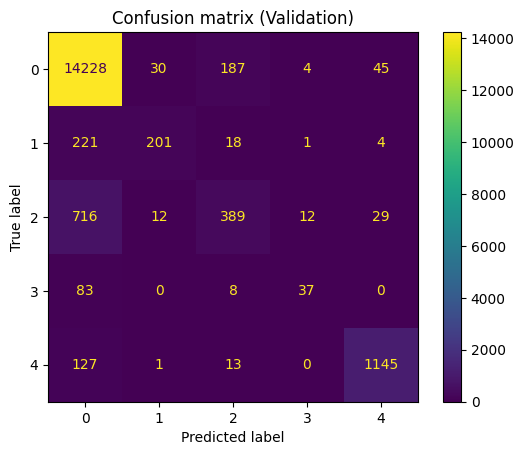

TEST accuracy: 0.9153115293257811
              precision    recall  f1-score   support

           0     0.9249    0.9849    0.9539     18118
           1     0.8062    0.4191    0.5515       556
           2     0.6671    0.3349    0.4460      1448
           3     0.5882    0.3704    0.4545       162
           4     0.9567    0.8800    0.9167      1608

    accuracy                         0.9153     21892
   macro avg     0.7886    0.5979    0.6645     21892
weighted avg     0.9046    0.9153    0.9037     21892



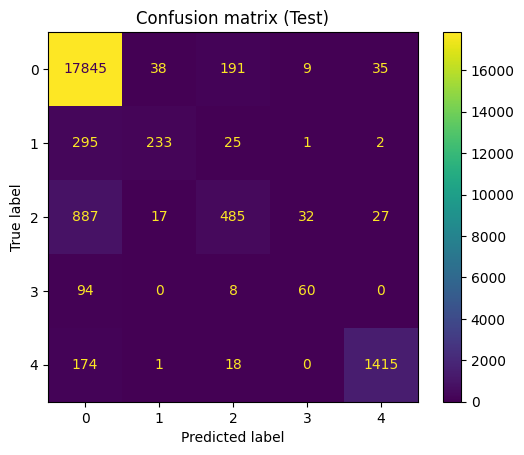

In [8]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Validation
val_pred = lr.predict(X_val_s)
print("VAL accuracy:", accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_val, val_pred)
plt.title("Confusion matrix (Validation)")
plt.show()

# Test
test_pred = lr.predict(X_test_s)
print("TEST accuracy:", accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, test_pred)
plt.title("Confusion matrix (Test)")
plt.show()


In [9]:
import time
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

Path("outputs").mkdir(parents=True, exist_ok=True)

results = []
grid = [(C, cw) for C in [0.01, 0.1, 1.0, 3.0, 10.0] for cw in [None, "balanced"]]

for i, (C, cw) in enumerate(grid, 1):
    t0 = time.perf_counter()

    model = LogisticRegression(
        max_iter=500,      # reduce from 3000 to speed up
        solver="lbfgs",
        C=C,
        class_weight=cw,
        tol=1e-3           # looser tolerance = faster
    )

    model.fit(X_tr_s, y_tr)
    pred = model.predict(X_val_s)

    acc = accuracy_score(y_val, pred)
    f1m = f1_score(y_val, pred, average="macro")
    f1w = f1_score(y_val, pred, average="weighted")

    results.append({
        "C": C,
        "class_weight": cw,
        "val_acc": acc,
        "val_f1_macro": f1m,
        "val_f1_weighted": f1w
    })

    dt = time.perf_counter() - t0
    print(f"[{i}/{len(grid)}] C={C}, cw={cw} -> acc={acc:.4f}, f1_macro={f1m:.4f} ({dt:.1f}s)")

df_results = pd.DataFrame(results).sort_values(["val_f1_macro", "val_acc"], ascending=False)
df_results.to_csv("outputs/lr_hyperparam_results.csv", index=False)
df_results.head(10)


[1/10] C=0.01, cw=None -> acc=0.9101, f1_macro=0.5847 (2.2s)
[2/10] C=0.01, cw=balanced -> acc=0.6684, f1_macro=0.4779 (2.7s)
[3/10] C=0.1, cw=None -> acc=0.9128, f1_macro=0.6361 (3.0s)
[4/10] C=0.1, cw=balanced -> acc=0.6711, f1_macro=0.4800 (5.3s)
[5/10] C=1.0, cw=None -> acc=0.9132, f1_macro=0.6496 (3.6s)
[6/10] C=1.0, cw=balanced -> acc=0.6730, f1_macro=0.4824 (6.2s)
[7/10] C=3.0, cw=None -> acc=0.9133, f1_macro=0.6481 (4.0s)
[8/10] C=3.0, cw=balanced -> acc=0.6736, f1_macro=0.4829 (5.7s)
[9/10] C=10.0, cw=None -> acc=0.9132, f1_macro=0.6492 (3.7s)
[10/10] C=10.0, cw=balanced -> acc=0.6723, f1_macro=0.4823 (5.7s)


,C,class_weight,val_acc,val_f1_macro,val_f1_weighted
4,1.00,None,0.913197,0.649578,0.901647
8,10.00,None,0.913197,0.649229,0.901676
6,3.00,None,0.913255,0.648134,0.901452
2,0.10,None,0.912798,0.636145,0.900842
0,0.01,None,0.910057,0.584744,0.895584
7,3.00,balanced,0.673634,0.482893,0.736465
5,1.00,balanced,0.673006,0.482440,0.736097
9,10.00,balanced,0.672263,0.482273,0.735375
3,0.10,balanced,0.671121,0.479982,0.734430
1,0.01,balanced,0.668437,0.477869,0.732768


VAL accuracy: 0.9131974187653475
              precision    recall  f1-score   support

           0     0.9246    0.9816    0.9522     14494
           1     0.8282    0.4225    0.5595       445
           2     0.6361    0.3411    0.4441      1158
           3     0.6538    0.2656    0.3778       128
           4     0.9379    0.8919    0.9143      1286

    accuracy                         0.9132     17511
   macro avg     0.7961    0.5805    0.6496     17511
weighted avg     0.9020    0.9132    0.9016     17511



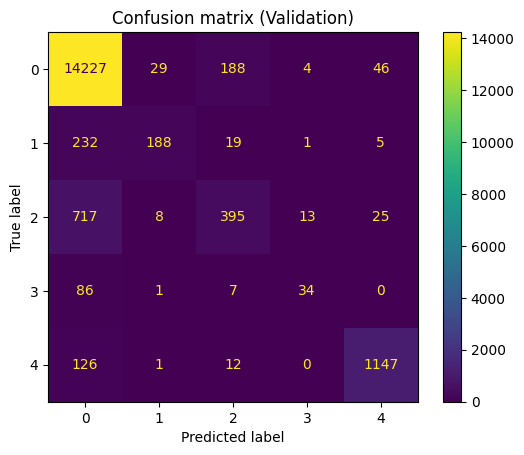

TEST accuracy: 0.9139868445094098
              precision    recall  f1-score   support

           0     0.9235    0.9845    0.9530     18118
           1     0.8284    0.3993    0.5388       556
           2     0.6467    0.3363    0.4425      1448
           3     0.5955    0.3272    0.4223       162
           4     0.9611    0.8762    0.9167      1608

    accuracy                         0.9140     21892
   macro avg     0.7910    0.5847    0.6547     21892
weighted avg     0.9031    0.9140    0.9022     21892



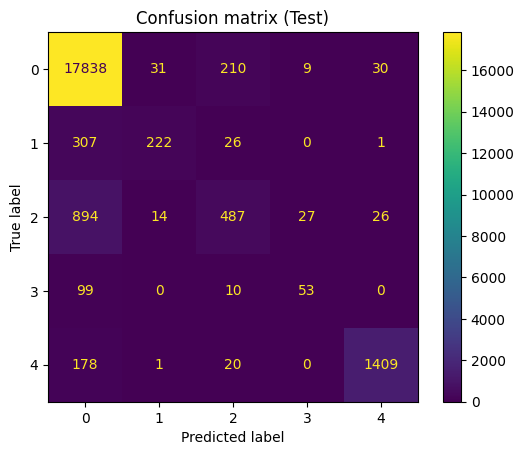

In [12]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_lr = LogisticRegression(
    solver="lbfgs",
    C=1.0,
    max_iter=500,
    tol=1e-3
)
best_lr.fit(X_tr_s, y_tr)

# Validation
val_pred = best_lr.predict(X_val_s)
print("VAL accuracy:", accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred, digits=4))
ConfusionMatrixDisplay.from_predictions(y_val, val_pred)
plt.title("Confusion matrix (Validation)")
plt.show()

# Test
test_pred = best_lr.predict(X_test_s)
print("TEST accuracy:", accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred, digits=4))
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)
plt.title("Confusion matrix (Test)")
plt.show()

